In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulsharma/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df = pd.read_csv('/Users/rahulsharma/GitHub/Movies-Genre-Classification/kaggle_movie_train.csv')

In [5]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [7]:
df.shape

(22579, 3)

In [8]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


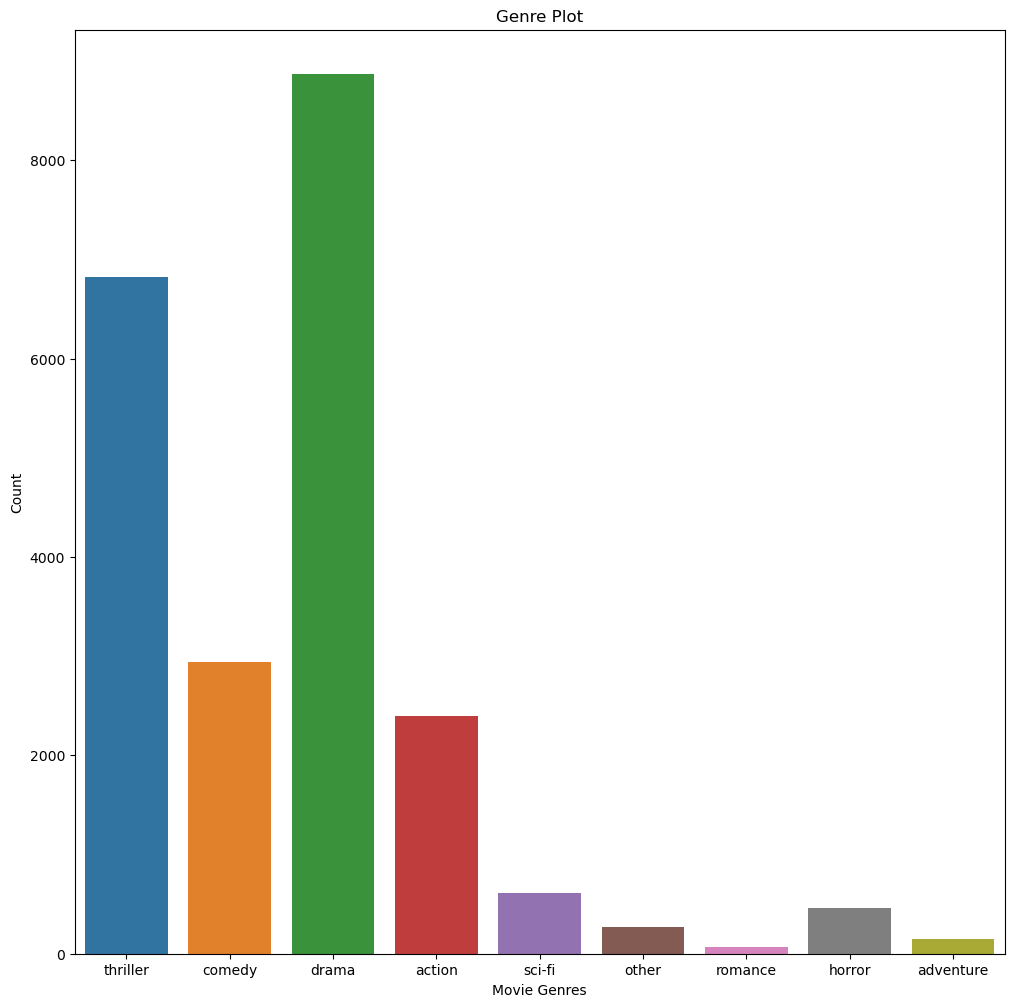

In [9]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

In [10]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [11]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 
                'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [12]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [13]:
df.drop('id', axis=1, inplace=True)

In [14]:
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):
    dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i]) 
    dialog = dialog.lower() 
    words = dialog.split() 
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))] 
    words = [ps.stem(word) for word in dialog_words] 
    dialog = ' '.join(words) 
    corpus.append(dialog) 

In [15]:
corpus[0:2]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [16]:
len(corpus)

22579

In [17]:
drama_words = []
for i in list(df[df['genre']==4].index):
    drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
    action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
    comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
    drama += drama_words[i]
    action += action_words[i]
    comedy += comedy_words[i]

DRAMA

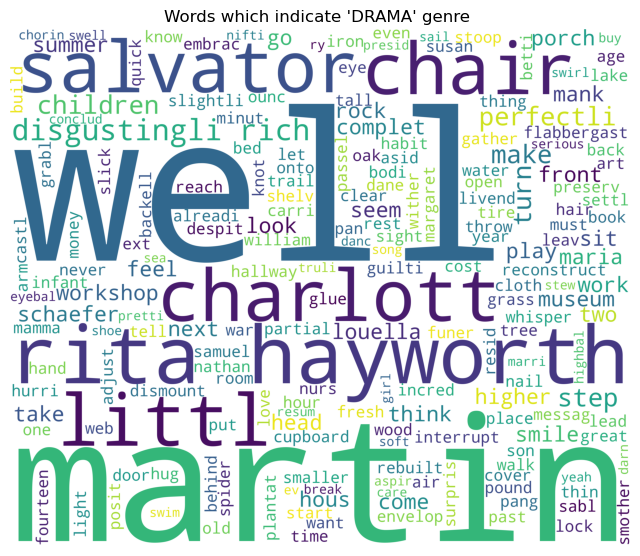

In [18]:
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

Action

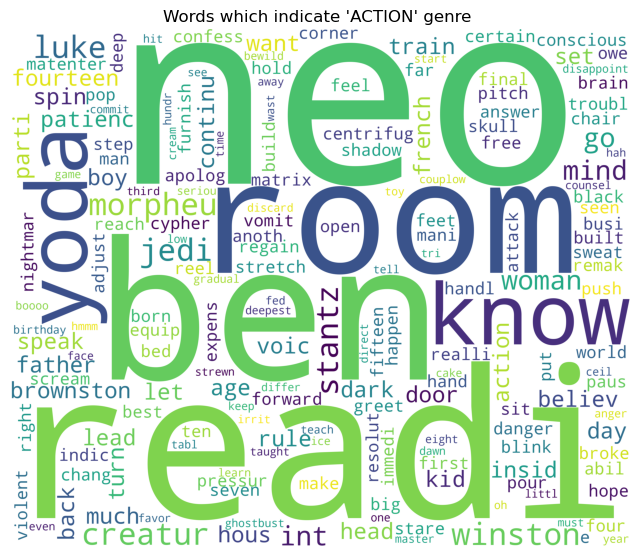

In [19]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

COMEDY

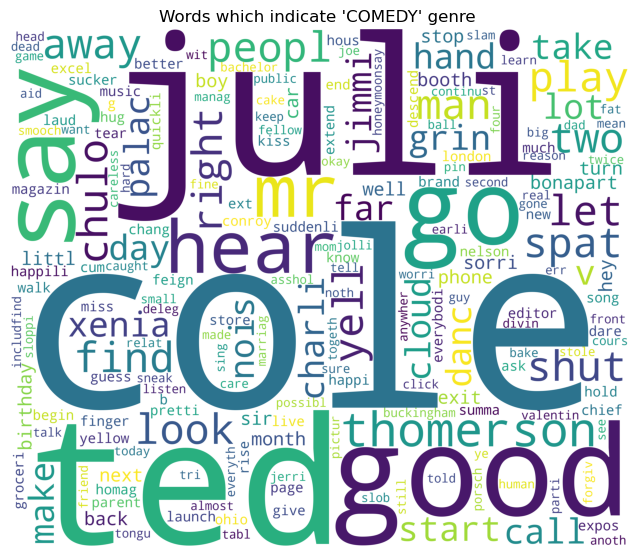

In [20]:
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()
y = df['genre'].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))


X_train size: (18063, 10000), X_test size: (4516, 10000)


In [27]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [28]:
nb_y_pred = nb_classifier.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [30]:
def genre_prediction(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return nb_classifier.predict(temp)[0]

## Testing the Model

In [31]:
test = pd.read_csv('/Users/rahulsharma/GitHub/Movies-Genre-Classification/kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [32]:
test.shape

(5589, 2)

In [33]:
test.drop('id', axis=1, inplace=True)

In [34]:
from random import randint
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: then he is gone. Ryuji smiles at us then laughs at something Dieter says. Joe's gaze swings to Rene. AL Joe, pay attention! OUTSIDE THE BANQUET JOE and RENE fool around. JOE Now, what? Another course of strange wiggling food. Joe looks alarmed. AL VO Don't touch a thing. JOE Don't worry! RENE I'm not worried, I'm not going to eat it. JOE This is a tough place to keep Kosher. A funny SOUND in his head. Al's voice BREAKS UP. JOE What is it? Across the table, Ryuji proudly answers him. RENE Hakasuti! As he slides the wriggling fish down his throat. INSIDE INT. THE POD Al is tense, momentarily distracted. He is having trouble with the pod. Sixty four hours on the clock. AL The batteries are dropping. Got to recharge them somehow. OUTSIDE BANQUET RYUJI pours the wine. RYUJI In honor of our...unexpected guest. Joe picks up his wineglass. RYUJI pours. INSIDE INT. THE POD Al looks up, spots a powder on the inside of the glass dissolve in the wine. He tries to warn Joe. AL VO No..Don't.